In [14]:
from langgraph.graph import StateGraph, START, END 
from typing import TypedDict

In [33]:
# define state

class BMIState(TypedDict):
    weight_kg: float  # in kilograms
    height_ft: float  # in feet
    bmi: float     # Body Mass Index
    category: str # BMI Category

In [34]:
# define functions

def compute_bmi(state: BMIState) -> BMIState:
    height = state["height_ft"] * 0.3048  # convert feet to meters
    weight = state["weight_kg"]

    bmi = weight / (height **2)

    state["bmi"] = round(bmi, 2)
    
    return state

def interpret_bmi(state: BMIState) -> BMIState:
    bmi = state["bmi"]
    
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    
    state["category"] = category
    return state

In [35]:
# define graph

graph = StateGraph(BMIState)

# add notes
graph.add_node("Compute_BMI", compute_bmi)
graph.add_node("Interpret_BMI", interpret_bmi)

# add edges
graph.add_edge(START, "Compute_BMI")
graph.add_edge("Compute_BMI", "Interpret_BMI")
graph.add_edge("Interpret_BMI", END)

# compile graph
workflow = graph.compile()

# execute graph
initial_state = {"weight_kg": 100, "height_ft": 5.35}
final_state = workflow.invoke(initial_state)

In [37]:
final_state

{'weight_kg': 100, 'height_ft': 5.35, 'bmi': 37.61, 'category': 'Obesity'}

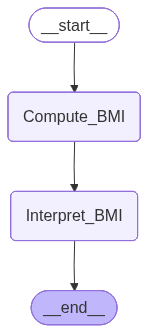

In [36]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())